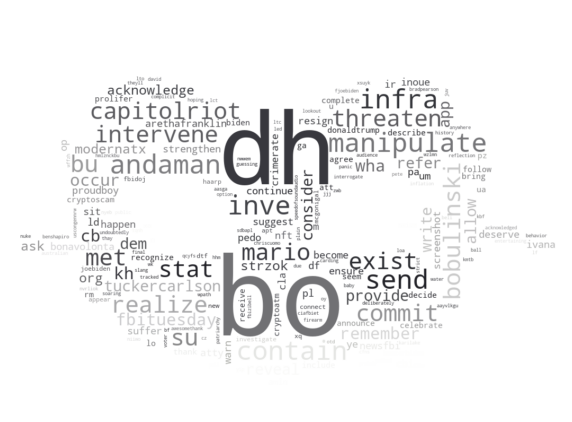

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')


#read in the data
tweet_data=pd.read_csv('../../data/raw-data/R_FBI_TEXT_DATA.csv')

#Column names
tweet_data.columns

#text data cleaning
#text data
tweet_data = tweet_data[['text']]

#replace # with space
def hashtag(text):
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text


#remove punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text) #removes numbers from text
    text = re.sub(r'https*\S+', '', text)

    return text
tweet_data['clean text']=tweet_data['text'].apply(lambda x: remove_punct(x))

#tokenization
def tokenization(text):
    text = re.split('\W+', text) #splitting each sentence/ tweet into its individual words
    return text

tweet_data['Tweet_tokenized'] = tweet_data['clean text'].apply(lambda x: tokenization(x.lower()))

#remove retweets
tweet_data = tweet_data[~tweet_data['text'].str.contains('RT')]

#remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    
    return text
   
tweet_data['Tweet_without_stop'] = tweet_data['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))

#stemming
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweet_data['Tweet_stemmed'] = tweet_data['Tweet_without_stop'].apply(lambda x: stemming(x))


wordnet = nltk.WordNetLemmatizer()

#lemmatizations
def lemmatizer(text):
    text = [wordnet.lemmatize(word) for word in text]
    return text

tweet_data['Tweet_lemmatized'] = tweet_data['Tweet_without_stop'].apply(lambda x: lemmatizer(x))

#Count Vectorizer
from random import sample
clean_tweets=list(set(tweet_data['clean text']))
sample=sample(clean_tweets,20)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample)
vectorizer.get_feature_names()
count_vect_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

##exporting the cleaned data to a csv file
tweet_data.to_csv('cleaned_twitter_FBI_data_py.csv')



#Data Visualization
all_clean_words=[]

for i in tweet_data['Tweet_lemmatized']:
    for j in i:
        all_clean_words.append(j)

all_clean_words=list(set(all_clean_words)) #removes duplicate values from the list

clean_words_str=' '.join(all_clean_words)


from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

mask = np.array(Image.open("../../501-project-website/images/VISUALISATION_USACRIME_TEXT_DATA_IMAGE2.png"))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False,mask=mask).generate(clean_words_str)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()
